# Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
car = pd.read_csv('Car_details_v3.csv')

In [3]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
car.shape

(8128, 13)

# Checking informations

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## There are null values in the attribute 'mileage', 'engine', 'max power', 'torque' , 'seats'

In [6]:
car.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [7]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## percentage of missing values w.r.t the dataframe car_details

In [8]:
car.isnull().sum()/len(car) *100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

### Insight from the missing values of the attributes:
#### 1) The percentage of missing values of the attributes is maximum 2-3%(approx) of the whole dataframe. So we can drop those instances for handling these missing values
#### 2) We can also apply other null imputation methods to fill up the null spaces of the respective attributes. 
#### For this dataframe we are choosing the second method i.e. Null Imputations instead of dropping the instances.

# Making a copy of the main dataset for processing and other analysis

In [9]:
car_details = car.copy()

In [10]:
car_details.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [11]:
#car_details.iloc[13].isnull()

## Checking the correlation before cleaning the data

In [12]:
car_details.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


## Here we are getting highest correlation coefficient between 'year' and 'seling_price' which is 0.414092 . But the other attributes like: 'mileage', 'engine', 'max_power' and 'torque' seem to be numeric and may have some correlation with the selling price.

## we have to convert 'mileage', 'engine', 'max_power', 'torque' to numerical attributes. We need to treat with the 'torque' attribute separately

In [13]:
attr = ['mileage', 'engine', 'max_power']
for i in attr:
    car_details[i] = car_details[i].apply(lambda x : (str(x).split(" ")[0]))

In [14]:
#car_details['mileage'] = car_details['mileage'].apply(lambda x : str(x).split(" ")[0])

In [15]:
car_details[['mileage','engine','max_power']]

,mileage,engine,max_power
0,23.4,1248,74
1,21.14,1498,103.52
2,17.7,1497,78
3,23.0,1396,90
4,16.1,1298,88.2
...,...,...,...
8123,18.5,1197,82.85
8124,16.8,1493,110
8125,19.3,1248,73.9
8126,23.57,1396,70


In [16]:
car_details.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061,57.5,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0,1399,68.1,160Nm@ 2000rpm,5.0


In [17]:
#type(car_details.iloc[13,8])

In [18]:
#car_details.info()

In [19]:
#car_details.isnull().sum()

In [20]:
#car_details.isnull().sum()/len(car_details) *100

In [21]:
#apply(lambda x : (str(x).split(" ")[0]).astype('float'))

## Converting the 'mileage', 'engine', 'max_power' to numeric from text or object type

In [22]:
attr = ['mileage', 'engine', 'max_power']
for i in attr:
    car_details[i] = pd.to_numeric(car_details[i],errors = 'coerce')

In [23]:
#car_details['max_power'] = pd.to_numeric(car_details['max_power'], errors = 'coerce')
#car_details['mileage'] = pd.to_numeric(car_details['mileage'], errors = 'coerce')
#car_details['engine'] = pd.to_numeric(car_details['engine'], errors = 'coerce')

In [24]:
car_details.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,160Nm@ 2000rpm,5.0


In [25]:
#car_details['mileage'] = car_details['mileage'].astype(float)
#car_details['mileage'].hist(bins = 10, figsize=(20,10))
#car_details['engine'] = car_details['engine'].astype(float)
#car_details['max_power'] = car_details['max_power'].astype(float)    # throwing error

In [26]:
car_details[['mileage','engine','max_power']]

,mileage,engine,max_power
0,23.40,1248.0,74.00
1,21.14,1498.0,103.52
2,17.70,1497.0,78.00
3,23.00,1396.0,90.00
4,16.10,1298.0,88.20
...,...,...,...
8123,18.50,1197.0,82.85
8124,16.80,1493.0,110.00
8125,19.30,1248.0,73.90
8126,23.57,1396.0,70.00


In [27]:
car_details.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [28]:
#car_details[['mileage','engine','max_power']].isnull().sum()

In [29]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


## we can see that the number of null values in max_power feature has been increased by one than before after fully converting it to float datatype from categorical or object datatype

In [30]:
corr = car_details.corr()

In [31]:
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000


In [32]:
corr.selling_price.sort_values(ascending=False)

selling_price    1.000000
max_power        0.748489
engine           0.455734
year             0.414092
seats            0.041358
mileage         -0.126054
km_driven       -0.225534
Name: selling_price, dtype: float64

## 'selling_prie' has the highest correlation with 'max_power' having approx value 0.75

<AxesSubplot:>

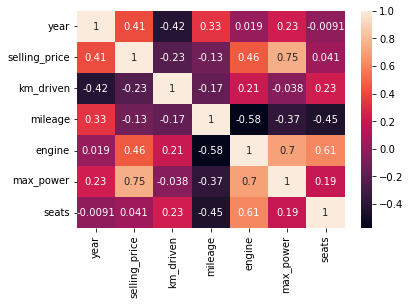

In [33]:
sns.heatmap(car_details.corr(),annot=True)

In [34]:
car_details['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [35]:
car['torque'].value_counts()

190Nm@ 2000rpm             530
200Nm@ 1750rpm             445
90Nm@ 3500rpm              405
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
128Nm@ 3100rpm               1
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
96  Nm at 3000  rpm          1
Name: torque, Length: 441, dtype: int64

### From this torque attribute we can say that it's extremely unorganized and the first few values have higher counts of vehicles and this count goes on gradually decreasing

## Seeing the name of all the columns of the dataframe

In [36]:
car_details.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Finding the number of unique values of all the attributes of the 'car_details' dataframe:

In [37]:
#car_details['name'].value_counts().sum()

In [38]:
#len(car_details['name'])

In [39]:
#car_details['name'].nunique()

In [40]:
for i in car_details.columns:
    print(f'The number of unique values in {i} is : ',car_details[i].nunique())
#    print("The number of unique values in "+ i +" is :", len(car_details[i].value_counts()) )

The number of unique values in name is :  2058
The number of unique values in year is :  29
The number of unique values in selling_price is :  677
The number of unique values in km_driven is :  921
The number of unique values in fuel is :  4
The number of unique values in seller_type is :  3
The number of unique values in transmission is :  2
The number of unique values in owner is :  5
The number of unique values in mileage is :  381
The number of unique values in engine is :  121
The number of unique values in max_power is :  319
The number of unique values in torque is :  441
The number of unique values in seats is :  9


In [41]:
type(pd.to_datetime('today').year)

int

## showing the unique values of the attributes

In [42]:
car_details['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [43]:
car_details['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991], dtype=int64)

In [44]:
car_details['year'].min()

1983

In [45]:
car_details['year'].max()

2020

In [46]:
car_details['km_driven'].unique()[:10]            # showing first 10 values

array([145500, 120000, 140000, 127000,  45000, 175000,   5000,  90000,
       169000,  68000], dtype=int64)

In [47]:
car_details['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [48]:
car_details['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [49]:
car_details['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [50]:
car_details['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [51]:
car_details['mileage'].unique()[:10]                # showing first 10 values 

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01])

In [52]:
car_details['engine'].unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993.,   nan, 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

In [53]:
car_details['max_power'].unique()[:30]         # showing first 30 values

array([ 74.  , 103.52,  78.  ,  90.  ,  88.2 ,  81.86,  57.5 ,  37.  ,
        67.1 ,  68.1 , 108.45,  60.  ,  73.9 ,    nan,  67.  ,  82.  ,
        88.5 ,  46.3 ,  88.73,  64.1 ,  98.6 ,  88.8 ,  83.81,  83.1 ,
        47.3 ,  73.8 ,  34.2 ,  35.  ,  81.83,  40.3 ])

In [54]:
car_details['torque'].unique()[:40]            # showing first 40 values

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm'], dtype=object)

## The insight from 'torque' column is not much clear as the values for each instance are not in proper orientation. So we are dropping that attribute from this dataframe.

In [55]:
car_details = car_details.drop('torque', axis=1)

In [56]:
car_details.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [57]:
car_details['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [58]:
pd.to_datetime('today')

Timestamp('2021-11-09 21:49:08.636480')

In [59]:
pd.to_datetime('today').year

2021

In [60]:
car_details['Year_of_service'] = car_details['year'].apply(lambda x : pd.to_datetime('today').year - x)

In [61]:
car_details[['year','Year_of_service']].head()

,year,Year_of_service
0,2014,7
1,2014,7
2,2006,15
3,2010,11
4,2007,14


In [62]:
corr1 = car_details.corr()

In [63]:
corr1

,year,selling_price,km_driven,mileage,engine,max_power,seats,Year_of_service
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144,-1.000000
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358,-0.414092
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336,0.418006
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085,-0.329145
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309,-0.018848
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999,-0.226320
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000,0.009144
Year_of_service,-1.000000,-0.414092,0.418006,-0.329145,-0.018848,-0.226320,0.009144,1.000000


## Making Box Plot of the numeric attributes to check if there is any outliers

## Box plot of 'max_power' attribute:

<AxesSubplot:ylabel='max_power'>

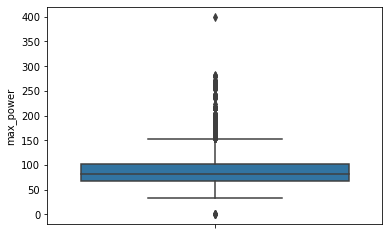

In [64]:
sns.boxplot(y='max_power', data=car_details)

<AxesSubplot:xlabel='year', ylabel='max_power'>

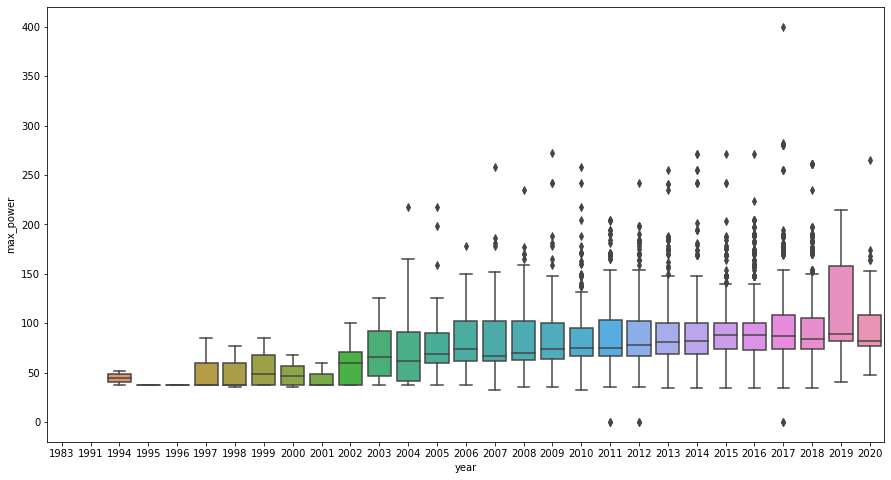

In [65]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='year', y='max_power',data=car_details)

## Box plot of 'engine' attribute:

<AxesSubplot:ylabel='engine'>

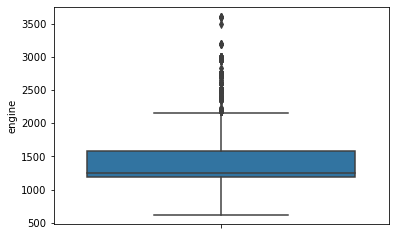

In [66]:
sns.boxplot(y='engine', data=car_details)

## Box plot of 'seats' attribute:

<AxesSubplot:ylabel='seats'>

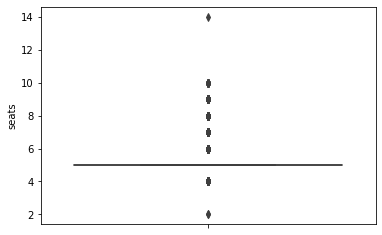

In [67]:
sns.boxplot(y='seats', data=car_details)

## Box plot of 'mileage' attribute:

<AxesSubplot:ylabel='mileage'>

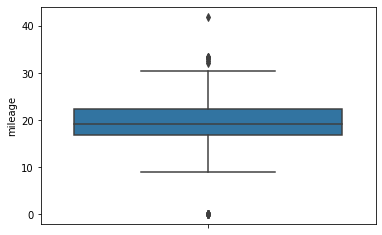

In [68]:
sns.boxplot(y='mileage', data=car_details)

<AxesSubplot:ylabel='km_driven'>

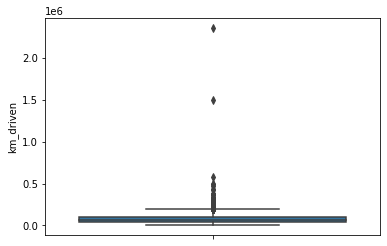

In [69]:
sns.boxplot(y='km_driven', data=car_details)

## As there are outliers present in the 'max_power','engine','mileage','seats' attribute so we have to impute its null values using the 'median' instead of 'mean' as 'mean' is influenced by outliers.

## Statistical summary for the object type attributes

In [70]:
car_details.describe(include=object)

,name,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128,8128
unique,2058,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,129,4402,6766,7078,5289


In [71]:
car_details['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

## Fuel

<AxesSubplot:xlabel='fuel', ylabel='count'>

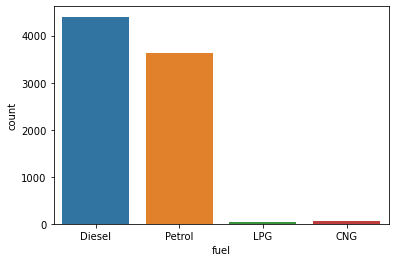

In [72]:
sns.countplot(x='fuel',data=car_details)

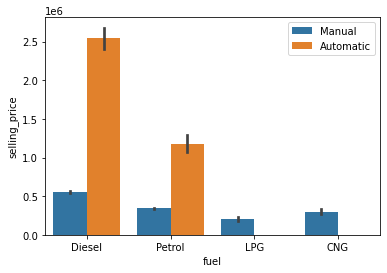

In [73]:
sns.barplot(x='fuel', y='selling_price', data=car_details,hue='transmission')
#plt.legend(bbox_to_anchor=(1,1))
plt.legend(loc=1)

In [74]:
#sns.catplot(x='fuel',y='selling_price',data=car_details, hue='transmission',kind='bar')

## Owner

<AxesSubplot:xlabel='owner', ylabel='count'>

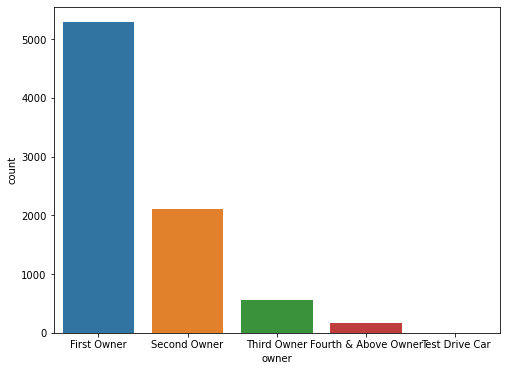

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(x='owner', data=car_details)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

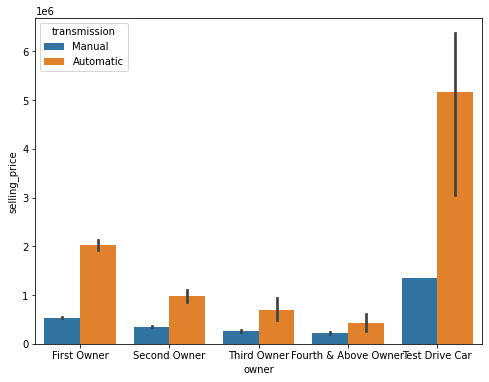

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(x='owner',y='selling_price',data=car_details,hue='transmission')

## Transmission

<AxesSubplot:xlabel='transmission', ylabel='count'>

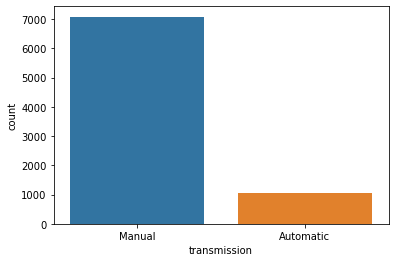

In [77]:
sns.countplot(x='transmission',data=car_details)

## Seller_type

<AxesSubplot:xlabel='seller_type', ylabel='count'>

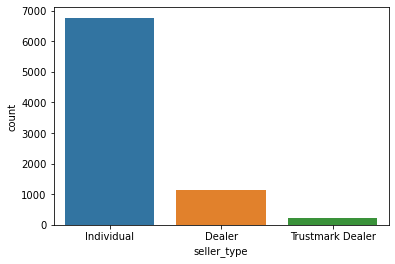

In [78]:
sns.countplot(x='seller_type',data=car_details)

In [79]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,14


In [80]:
car_details.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Year_of_service
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719,7.195989
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588,4.044249
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,1.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,4.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,6.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,10.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,38.000000


## Histogram and KDE 

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

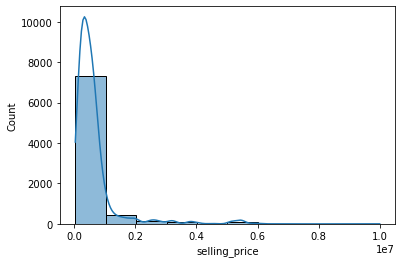

In [81]:
sns.histplot(x='selling_price',data=car_details,bins=10,kde=True)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

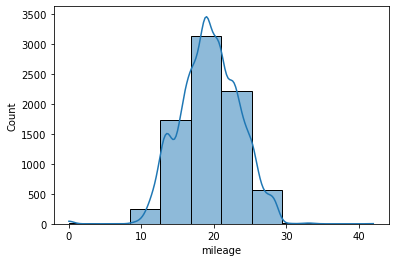

In [82]:
sns.histplot(x='mileage',data=car_details,bins=10,kde=True)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

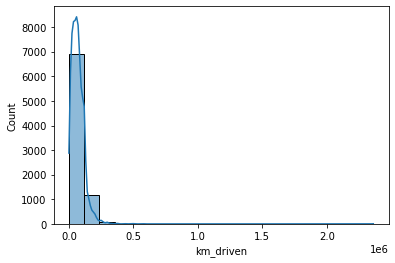

In [83]:
sns.histplot(x='km_driven',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='engine', ylabel='Count'>

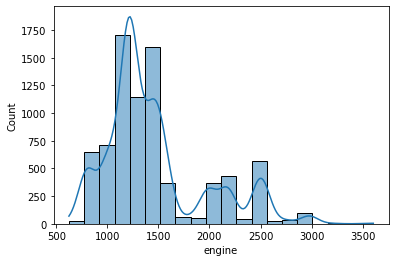

In [84]:
sns.histplot(x='engine',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='max_power', ylabel='Count'>

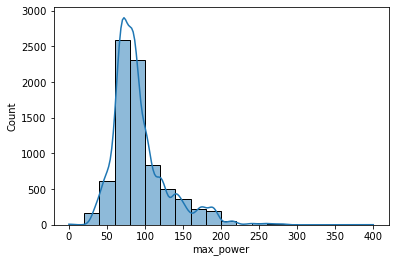

In [85]:
sns.histplot(x='max_power',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='seats', ylabel='Count'>

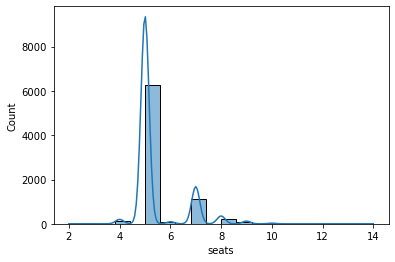

In [86]:
sns.histplot(x='seats',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

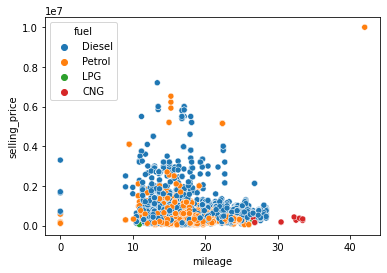

In [87]:
sns.scatterplot(x='mileage',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

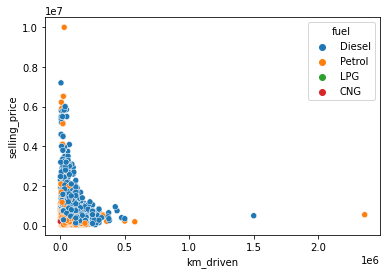

In [88]:
sns.scatterplot(x='km_driven',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

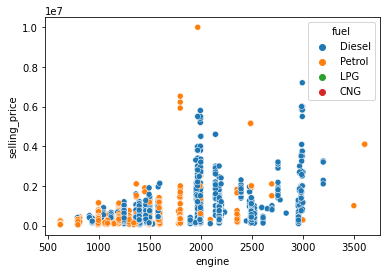

In [89]:
sns.scatterplot(x='engine',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

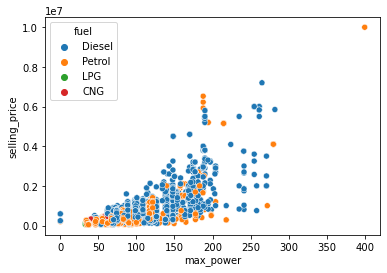

In [90]:
sns.scatterplot(x='max_power',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

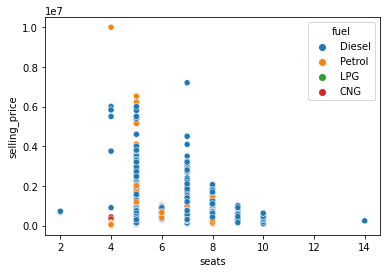

In [91]:
sns.scatterplot(x='seats',y='selling_price',data=car_details, hue='fuel')

<Figure size 720x432 with 0 Axes>

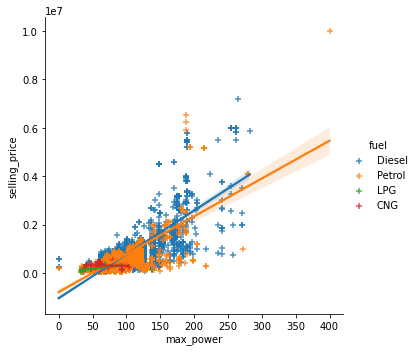

In [92]:
plt.figure(figsize=(10,6))
sns.lmplot(x='max_power',y='selling_price',markers='+',data=car_details,hue='fuel')

<Figure size 720x432 with 0 Axes>

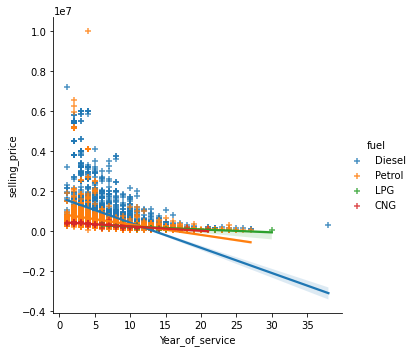

In [93]:
plt.figure(figsize=(10,6))
sns.lmplot(x='Year_of_service',y='selling_price',markers='+',data=car_details,hue='fuel')

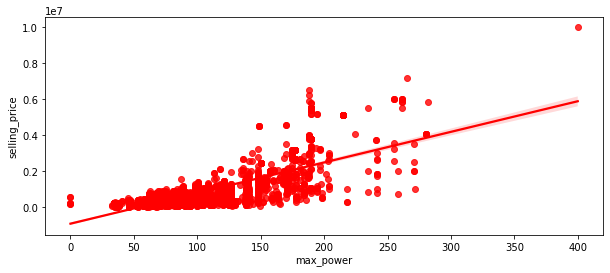

In [94]:
plt.figure(figsize=(10,4))
sns.regplot(x='max_power', y='selling_price', data=car_details,marker ='o',color='red')
plt.show()

In [95]:
car_details

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,8
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,14
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,12
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,8


In [96]:
car_details[car_details['Year_of_service']==38]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
316,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,38


## 'Year_of_service' is the column made for EDA and lloking into the selling price variation for old car

In [97]:
car_details = car_details.drop('Year_of_service',axis=1)

In [98]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [99]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [100]:
#X = car_details.drop('selling_price', axis =1)
#y = car_details['selling_price']

In [101]:
#y.value_counts().sort_values(ascending = True)

In [102]:
#from sklearn.model_selection import train_test_split

In [103]:
#, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [104]:
#X_train.head()

In [105]:
#X_test.head()

In [106]:
#y_train.head()

In [107]:
#y_test.head()

In [108]:
#len(X_train)/len(car_details)

In [109]:
#len(X_test)/len(car_details)

In [110]:
#y_test.isnull().any()

In [111]:
#y_train.isnull().any()

In [112]:
car_details['name'].nunique()

2058

In [113]:
car_details['name_company'] = car_details['name'].apply(lambda x : x.split()[0])

In [114]:
car_details.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,name_company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,Hyundai
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0,Maruti
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0,Maruti
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0,Toyota
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,Ford


In [115]:
car_details['name_company'].nunique()

32

In [116]:
car_details = car_details.drop(['name'], axis =1)

In [117]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,name_company
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


In [119]:
num = car_details.drop(['name_company','fuel','seller_type','transmission','owner'],axis = 1)
cat = car_details[['name_company','fuel','seller_type','transmission','owner']]

In [120]:
len(car_details.columns)

12

In [121]:
#car_details['year'].isnull().any()

In [122]:
#X_train_cat.isnull().sum()

In [123]:
#X_train_num.isnull().sum()

In [124]:
#X_train_num = X_train_num.fillna(X_train_num.median())

In [125]:
#X_train_num.isnull().sum()

In [126]:
#X_test_num = X_test.drop(['name','fuel','seller_type','transmission','owner'],axis = 1)
#X_test_cat = X_test[['name','fuel','seller_type','transmission','owner']]

In [127]:
#X_test_num.isnull().sum()

In [128]:
#X_test_num = X_test_num.fillna(X_test_num.median())

In [129]:
#X_test_num.isnull().sum()

## Scaling

In [130]:
### Normally we follow standard scaling to avoid the error of saturation which is caused for min-max scaling
### Min-Max scaling brings all the data in a prticular range for which we can't distinguish data with a very high value and
### a very low value. This problem can be avoided through standard scaling. Standard scaling doesn't bring the data in any
### particular range. Rather after this the values remain distinguishable and a curve like normal distribution can be found
### It is for doing the scaling operation on the numerical data

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
car_num_scaled = scaler.fit_transform(num)

In [134]:
car_num_scaled

array([[ 0.04846419, -0.2335288 ,  1.33836255, ..., -0.41800262,
        -0.48905092, -0.43429672],
       [ 0.04846419, -0.33275929,  0.88741086, ...,  0.07814289,
         0.33506427, -0.43429672],
       [-1.9297752 , -0.5957201 ,  1.24109846, ...,  0.0761583 ,
        -0.3773822 , -0.43429672],
       ...,
       [-1.18793543, -0.31787472,  0.88741086, ..., -0.41800262,
        -0.49184264, -0.43429672],
       [-0.19881574, -0.43198978, -0.79260528, ..., -0.12428448,
        -0.60071965, -0.43429672],
       [-0.19881574, -0.43198978, -0.79260528, ..., -0.12428448,
        -0.60071965, -0.43429672]])

In [135]:
cat.columns

Index(['name_company', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
hot_encoder = OneHotEncoder(sparse = False)

In [139]:
car_cat_hot_encoded = hot_encoder.fit_transform(cat.values)

In [158]:
hot_encoder.

AttributeError: 'OneHotEncoder' object has no attribute 'columns'

In [157]:
pd.DataFrame(car_cat_hot_encoded, columns = hot_encoder.categories_ )

ValueError: all arrays must be same length

In [140]:
hot_encoder.categories_ 

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object)]

In [141]:
car_cat_hot_encoded [:5] 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

## Combining Preprocessed result

In [150]:
num_car = pd.DataFrame(car_num_scaled, columns = num.columns)

In [153]:
type(num.columns)

pandas.core.indexes.base.Index

In [154]:
cat_car = pd.DataFrame(car_cat_hot_encoded,  = hot_encoder.categories_)

ValueError: all arrays must be same length

In [142]:
car_final = np.c_[car_num_scaled,car_cat_hot_encoded ]

In [143]:
car_final

array([[ 0.04846419, -0.2335288 ,  1.33836255, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04846419, -0.33275929,  0.88741086, ...,  1.        ,
         0.        ,  0.        ],
       [-1.9297752 , -0.5957201 ,  1.24109846, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18793543, -0.31787472,  0.88741086, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19881574, -0.43198978, -0.79260528, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19881574, -0.43198978, -0.79260528, ...,  0.        ,
         0.        ,  0.        ]])

In [144]:
car_final.shape

(8128, 53)

In [145]:
pd.DataFrame(car_final)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.048464,-0.233529,1.338363,0.986209,-0.418003,-0.489051,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.048464,-0.332759,0.887411,0.426372,0.078143,0.335064,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.929775,-0.595720,1.241098,-0.425769,0.076158,-0.377382,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.940656,-0.512615,1.011202,0.887123,-0.124284,-0.042376,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-1.682495,-0.630451,0.887411,-0.822114,-0.318774,-0.092627,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,-0.198816,-0.394778,0.710567,-0.227597,-0.519216,-0.241984,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8124,-1.682495,-0.624249,0.869726,-0.648713,0.068220,0.515968,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8125,-1.187935,-0.317875,0.887411,-0.029424,-0.418003,-0.491843,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8126,-0.198816,-0.431990,-0.792605,1.028321,-0.124284,-0.600720,-0.434297,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Preprocessing on Test Data

In [ ]:
X_test.info()

In [ ]:
X_test.head()

In [ ]:
X_test_num_scaled = scaler.fit_transform(X_test_num)

In [ ]:
X_test_num

In [ ]:
X_test_cat['name_company'] = X_test_cat['name'].apply(lambda x : x.split()[0])

In [ ]:
X_test_cat.head()

In [ ]:
X_test_cat_hot_encoded = hot_encoder.fit_transform(X_test_cat[['fuel','seller_type','transmission','owner','name_company']].values)

In [ ]:
hot_encoder.categories_

In [ ]:
X_test_cat_hot_encoded[:5]

## Combining Preprocessed results on X_test

In [ ]:
X_test_final = np.c_[X_test_num_scaled, X_test_cat_hot_encoded]

In [ ]:
X_test_final[0]

In [ ]:
X_train_final

### Applying Linear Regression Model just to check how much the prediction is varying from the actual label

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train_final, y_train)

In [ ]:
y_hat = lin_reg.predict(X_train_final)

In [ ]:
y_hat[0:5]

In [ ]:
y_train[0:5]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_reg_train = mean_squared_error(y_train, y_hat)

In [ ]:
rmse_reg_train = np.sqrt(mse_reg_train)

In [ ]:
rmse_reg_train

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, y_hat)

In [ ]:
len(X_test_final)

In [ ]:
len(y_test)

In [ ]:
X_train_final.shape

In [ ]:
X_test_final.shape

In [ ]:
X_test

In [ ]:
a = pd.factorize(car_details['transmission'])

In [ ]:
a[0:15]

In [ ]:
y_hat_test = lin_reg.predict(X_test_final)

In [ ]:
y_hat_test[0:5]

In [ ]:
y_test[0:5]

In [ ]:
mse_reg_test = mean_squared_error(y_test, y_hat_test)

In [ ]:
rmse_reg_test = np.sqrt(mse_reg_test)

In [ ]:
rmse_reg_test

In [ ]:
r2_score(y_test, y_hat_test)